In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import json
import math

In [8]:
df = pd.read_csv("../data/mb_problem_holds.csv")

In [9]:
print(df.columns)
#print(df['Holdsetup'])
print(df['Moves'][0])

Index(['Method', 'Name', 'Grade', 'UserGrade', 'MoonBoardConfiguration',
       'MoonBoardConfigurationId', 'Setter', 'FirstAscender', 'Rating',
       'UserRating', 'Repeats', 'Attempts', 'Holdsetup', 'IsBenchmark',
       'IsMaster', 'IsAssessmentProblem', 'ProblemType', 'Moves', 'Holdsets',
       'Locations', 'RepeatText', 'NumberOfTries', 'NameForUrl', 'Upgraded',
       'Downgraded', 'Id', 'ApiId', 'DateInserted', 'DateUpdated',
       'DateDeleted', 'DateTimeString'],
      dtype='object')
[{'Id': 1542554, 'Description': 'J5', 'IsStart': True, 'IsEnd': False}, {'Id': 1542555, 'Description': 'I9', 'IsStart': False, 'IsEnd': False}, {'Id': 1542556, 'Description': 'E14', 'IsStart': False, 'IsEnd': False}, {'Id': 1542557, 'Description': 'H18', 'IsStart': False, 'IsEnd': True}]


In [10]:
hold_count = {}
problems = df['Moves']
for problem in problems:
    problem = problem.replace("'", '"')
    problem = problem.replace("True", 'true')
    problem = problem.replace("False", 'false')
    problem = json.loads(problem)
    for hold in problem:
        pos = hold['Description'] 
        pos = pos[0].upper() + pos[1:]
        if pos in hold_count:
            hold_count[pos] += 1
        else:
            hold_count[pos] = 1

print(hold_count)

{'J5': 65, 'I9': 17, 'E14': 32, 'H18': 34, 'K6': 10, 'K7': 8, 'D10': 40, 'H14': 30, 'A16': 6, 'A18': 49, 'D3': 35, 'B4': 36, 'G7': 18, 'I8': 13, 'K12': 9, 'H15': 7, 'C18': 46, 'E6': 46, 'G2': 44, 'J6': 4, 'F8': 11, 'J12': 7, 'F15': 51, 'F16': 3, 'H7': 9, 'K8': 10, 'K10': 7, 'K13': 1, 'G16': 10, 'I4': 21, 'E7': 27, 'F12': 19, 'D13': 19, 'I15': 19, 'I18': 67, 'G14': 35, 'A12': 7, 'D6': 25, 'F9': 24, 'H9': 26, 'E16': 46, 'F10': 39, 'F6': 14, 'K5': 65, 'K18': 49, 'A5': 47, 'C7': 29, 'F11': 55, 'K11': 12, 'J14': 12, 'E13': 51, 'H12': 47, 'J2': 23, 'K9': 15, 'G11': 27, 'C12': 13, 'D18': 114, 'H8': 33, 'I14': 47, 'D15': 44, 'A15': 1, 'E18': 82, 'I6': 17, 'C14': 15, 'G18': 81, 'H11': 37, 'B12': 11, 'D8': 23, 'F5': 107, 'F7': 25, 'D17': 25, 'C5': 45, 'E9': 21, 'D11': 14, 'G17': 30, 'E10': 41, 'D7': 3, 'I11': 20, 'A14': 25, 'B9': 17, 'B3': 34, 'D5': 14, 'B18': 27, 'B13': 7, 'E8': 70, 'C11': 6, 'I13': 19, 'C15': 22, 'E12': 66, 'F14': 58, 'B16': 20, 'B10': 14, 'A9': 27, 'I5': 32, 'C9': 18, 'B6': 1

In [11]:
# Functions that convert french grade to V grade and vice versa for bouldering problems
def french_to_V(g):
    conversion_table = {'4':'v0', '5': 'v1', '5+':'v2', '6a':'v3', '6a+':'v3', '6b':'v4', '6b+':'v4', '6c':'v5', '6c+':'v6',
                       '7a':'v6', '7a+':'v7', '7b':'v8', '7b+':'v8', '7c':'v9', '7c+':'v10', '8a':'v11', '8a+':'v12', '8b':'v13', '8b+':'v14'}
    return conversion_table[g.lower()]

def V_to_French(g):
    pass

In [12]:
xdim = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11}
ydim = [i for i in range(19, 0, -1)]
# print(xdim)
# print(ydim)
def get_hold_coords(hold, xdim = xdim, ydim = ydim):
    col = xdim[hold[0]] -1
    row = ydim[int(hold[1:])] - 1
    return (row, col)

hold_positions = {}
for pos in hold_count.keys():
    hold_positions[pos] = get_hold_coords(pos, xdim, ydim)

print(hold_positions)

{'J5': (13, 9), 'I9': (9, 8), 'E14': (4, 4), 'H18': (0, 7), 'K6': (12, 10), 'K7': (11, 10), 'D10': (8, 3), 'H14': (4, 7), 'A16': (2, 0), 'A18': (0, 0), 'D3': (15, 3), 'B4': (14, 1), 'G7': (11, 6), 'I8': (10, 8), 'K12': (6, 10), 'H15': (3, 7), 'C18': (0, 2), 'E6': (12, 4), 'G2': (16, 6), 'J6': (12, 9), 'F8': (10, 5), 'J12': (6, 9), 'F15': (3, 5), 'F16': (2, 5), 'H7': (11, 7), 'K8': (10, 10), 'K10': (8, 10), 'K13': (5, 10), 'G16': (2, 6), 'I4': (14, 8), 'E7': (11, 4), 'F12': (6, 5), 'D13': (5, 3), 'I15': (3, 8), 'I18': (0, 8), 'G14': (4, 6), 'A12': (6, 0), 'D6': (12, 3), 'F9': (9, 5), 'H9': (9, 7), 'E16': (2, 4), 'F10': (8, 5), 'F6': (12, 5), 'K5': (13, 10), 'K18': (0, 10), 'A5': (13, 0), 'C7': (11, 2), 'F11': (7, 5), 'K11': (7, 10), 'J14': (4, 9), 'E13': (5, 4), 'H12': (6, 7), 'J2': (16, 9), 'K9': (9, 10), 'G11': (7, 6), 'C12': (6, 2), 'D18': (0, 3), 'H8': (10, 7), 'I14': (4, 8), 'D15': (3, 3), 'A15': (3, 0), 'E18': (0, 4), 'I6': (12, 8), 'C14': (4, 2), 'G18': (0, 6), 'H11': (7, 7), 'B1

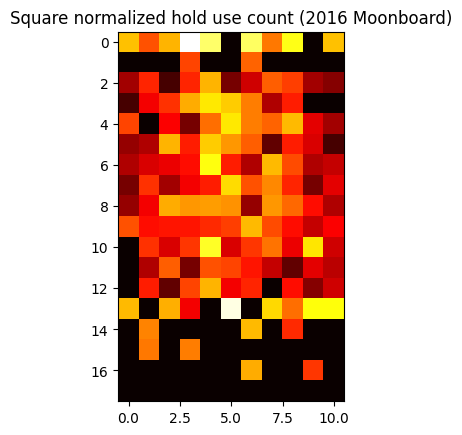

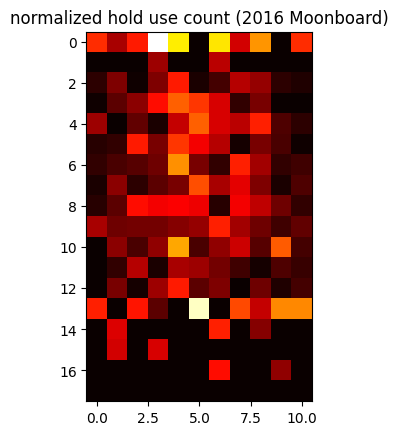

In [13]:
def hold_use_count_2d(dimensions, hold_count, hold_positions, ):
    """
    Outputs a 2d numpy array with the hold use count
    Args:
        Dimensions (tuple(int)): two-tuple with the hight and width of board

        hold_count (dict(str: int)): key is alphanumeric position on board, 
                                   value is number of times hold appears in the dataset

        hold_positions(dict(str: tuple(int, int))): key is alphanumeric position on board
                                                    value is numeric row and col from top left of board
    Returns:
        np.2darray(floats): normalized hold use heatmap
    """

    use_count = np.zeros(dimensions)
    for h in hold_count:
        pos = hold_positions[h]
        use_count[pos[0]][pos[1]] = hold_count[h]
    #normalize_use = use_count / use_count.max()
    return use_count


use_array = hold_use_count_2d((18, 11), hold_count, hold_positions)

#square normalized count
normalized1 = np.sqrt(use_array)
plt.imshow(normalized1, cmap='hot', interpolation='nearest')
plt.title("Square normalized hold use count (2016 Moonboard)")
plt.show()

#non-normalized count
normalized2 = use_array
plt.imshow(normalized2, cmap='hot', interpolation='nearest')
plt.title("normalized hold use count (2016 Moonboard)")
plt.show()



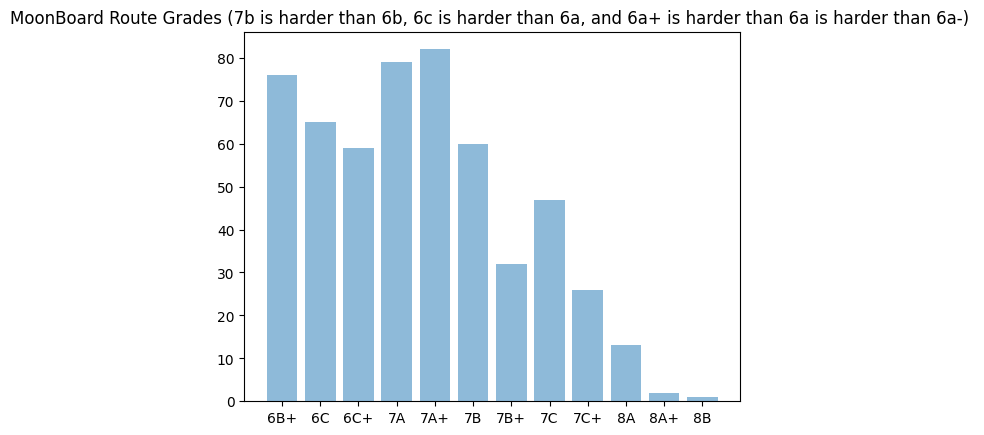

In [14]:
# Distribution of Grades French scale
french_grade_order = ['4', '5', '5+', '6a', '6a+', '6b', '6b+', '6c', '6c+',
                       '7a', '7a+', '7b', '7b+', '7c', '7c+', '8a', '8a+', '8b', '8b+']

# Finds number of climbs at each grade and sorts them by difficulty
grades = df['Grade'].to_numpy()
unique_elements, counts = np.unique(grades, return_counts=True)
counts = [(french_grade_order.index(e.lower()), e,c) for e, c in zip(unique_elements, counts)]
counts.sort(key = lambda x: x[0])
grade = [i[1] for i in counts]
count = [int(i[2]) for i in counts]

plt.bar(grade, count, align='center', alpha=0.5)
plt.title("MoonBoard Route Grades (7b is harder than 6b, 6c is harder than 6a, and 6a+ is harder than 6a is harder than 6a-) ")
plt.show()


In [15]:
#function to find distance between holds
def hold_distance(h1, h2):
    """
    Returns distance in milimeters between two hold

    Args:
        h1 (tuple(int, int)): hold coordinate
        h2 (tuple(int, int)): hold coordinate
    Return:
        int: euclidean distance between holds.
    """
    return np.sqrt(np.power(h1[0]- h2[0], 2) + np.power(h1[1]- h2[1], 2))

def hold_distance_in_mm(d, hold_dist_in_meters, metric_output = False):
    if metric_output:
        return hold_dist_in_meters * d
    else:
        return hold_dist_in_meters * d * 3.28084
    
# converts french grade to numeric value
def french_grade_numeric_converter(grade):
    french_grade_order = ['4', '5', '5+', '6a', '6a+', '6b', '6b+', '6c', '6c+',
                       '7a', '7a+', '7b', '7b+', '7c', '7c+', '8a', '8a+', '8b', '8b+']
    return french_grade_order.index(grade) + 1
    




[([4.123105625617661, 6.4031242374328485, 5.0], '8B'), ([1.0, 7.615773105863909, 5.656854249492381, 7.280109889280518, 2.0], '8A+'), ([2.23606797749979, 5.830951894845301, 2.23606797749979, 4.47213595499958, 3.605551275463989, 1.0, 5.830951894845301], '8A+'), ([4.47213595499958, 5.0, 4.47213595499958, 5.656854249492381, 5.0, 1.0, 5.385164807134504], '8A'), ([5.830951894845301, 1.0, 3.1622776601683795, 2.0, 3.0, 5.0, 2.23606797749979], '8A'), ([5.0, 5.0990195135927845, 2.23606797749979, 5.385164807134504, 3.0], '8A'), ([3.1622776601683795, 4.47213595499958, 8.94427190999916, 6.324555320336759, 2.0, 6.0, 2.0], '8A'), ([3.605551275463989, 2.0, 6.324555320336759, 4.242640687119285], '8A'), ([5.0, 5.0990195135927845, 4.0, 5.385164807134504, 7.211102550927978, 6.324555320336759], '8A'), ([2.8284271247461903, 5.0, 5.0, 3.1622776601683795, 4.123105625617661], '8A'), ([4.123105625617661, 3.0, 4.242640687119285, 3.1622776601683795, 5.0, 2.8284271247461903], '8A'), ([2.0, 5.0990195135927845, 4.12

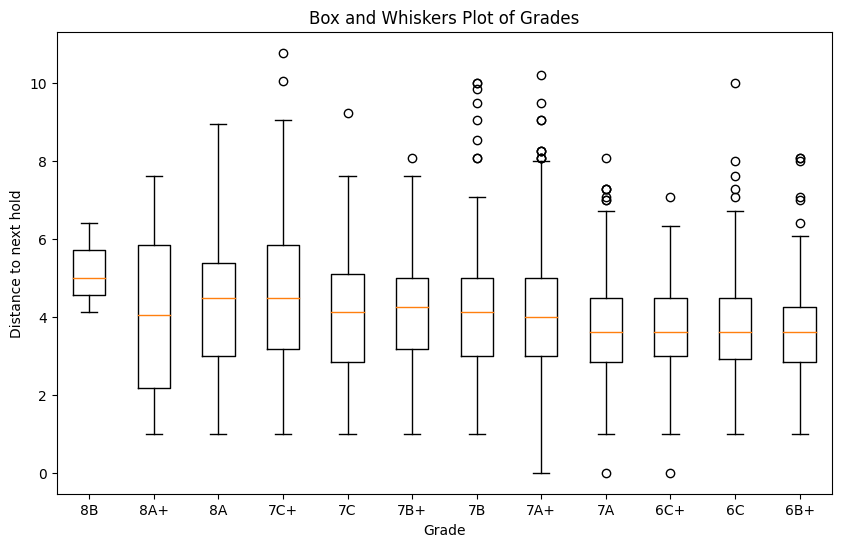

12
12


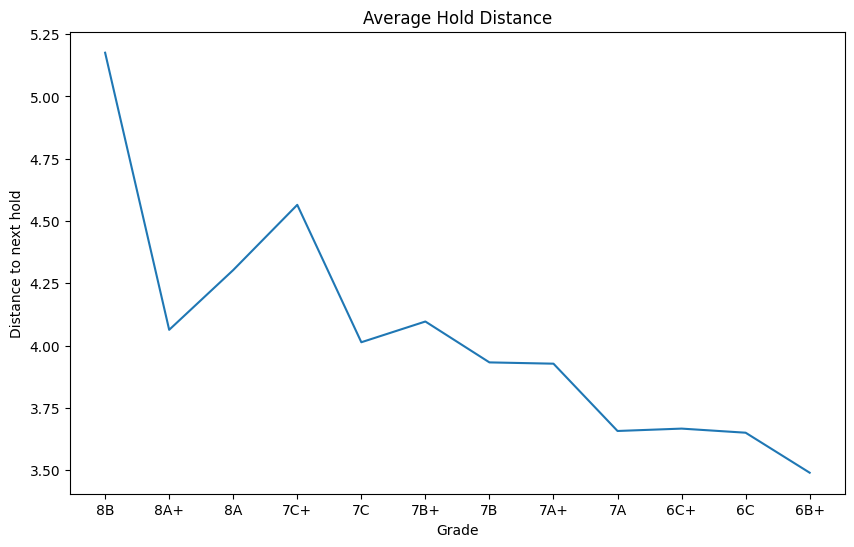

In [16]:
# Function to get distance to each hold
problem_hold_distance = []
problems = df['Moves']
grades = df['Grade']

for problem, grade in zip(problems, grades):
    problem = problem.replace("'", '"')
    problem = problem.replace("True", 'true')
    problem = problem.replace("False", 'false')
    problem = json.loads(problem)
    holds = []
    for hold in problem:
        pos = hold['Description'] 
        pos = pos[0].upper() + pos[1:]
        #Start_or_end = hold['IsStart'] or hold['IsEnd']
        holds.append(pos)
    # Split holds into tuples sort in ascending height order 
    holds = [(hold[0], int(hold[1:])) for hold in holds]
    holds.sort(key=lambda x: x[1])
    holds = [c + str(r)  for c, r in holds]

    next_hold_distances = []    
    for i1 in range(len(holds)-1):
        h1_coords = get_hold_coords(holds[i1])
        h2_coords = get_hold_coords(holds[i1 + 1])
        d = hold_distance(h1_coords, h2_coords)
        next_hold_distances.append(d)

    problem_hold_distance.append((next_hold_distances, grade))
print(problem_hold_distance)
    

grade_data = {}
for d in problem_hold_distance:
    if d[1] not in grade_data:
        grade_data[d[1]] = []
    grade_data[d[1]].extend(d[0])

# Create a list of values for each grade
grades = []
values = []
for grade, grade_values in grade_data.items():
    grades.append(grade)
    values.append(grade_values)

# Plot box and whisker plots for each grade
plt.figure(figsize=(10, 6))
plt.boxplot(values, labels=grades)
plt.xlabel('Grade')
plt.ylabel('Distance to next hold')
plt.title('Box and Whiskers Plot of Grades')
plt.show()


grades = []
mean_values = []
for grade, grade_values in grade_data.items():
    grades.append(grade)
    mean_values.append(np.mean(grade_values))
print(len(mean_values))
print(len(grades))

# Plot box and whisker plots for each grade
plt.figure(figsize=(10, 6))
plt.plot(grades, mean_values)
plt.xlabel('Grade')
plt.ylabel('Distance to next hold')
plt.title('Average Hold Distance')
plt.show()


In [17]:
# heat map for hold difficulty
print(problem_hold_distance)

[([4.123105625617661, 6.4031242374328485, 5.0], '8B'), ([1.0, 7.615773105863909, 5.656854249492381, 7.280109889280518, 2.0], '8A+'), ([2.23606797749979, 5.830951894845301, 2.23606797749979, 4.47213595499958, 3.605551275463989, 1.0, 5.830951894845301], '8A+'), ([4.47213595499958, 5.0, 4.47213595499958, 5.656854249492381, 5.0, 1.0, 5.385164807134504], '8A'), ([5.830951894845301, 1.0, 3.1622776601683795, 2.0, 3.0, 5.0, 2.23606797749979], '8A'), ([5.0, 5.0990195135927845, 2.23606797749979, 5.385164807134504, 3.0], '8A'), ([3.1622776601683795, 4.47213595499958, 8.94427190999916, 6.324555320336759, 2.0, 6.0, 2.0], '8A'), ([3.605551275463989, 2.0, 6.324555320336759, 4.242640687119285], '8A'), ([5.0, 5.0990195135927845, 4.0, 5.385164807134504, 7.211102550927978, 6.324555320336759], '8A'), ([2.8284271247461903, 5.0, 5.0, 3.1622776601683795, 4.123105625617661], '8A'), ([4.123105625617661, 3.0, 4.242640687119285, 3.1622776601683795, 5.0, 2.8284271247461903], '8A'), ([2.0, 5.0990195135927845, 4.12

In [18]:
# Function to get distance to each hold
problem_hold_distance = []
problems = df['Moves']
grades = df['Grade']
hold_difficulty_dict = {}
hold_distance_dict = {}

for problem, grade in zip(problems, grades):
    problem = problem.replace("'", '"')
    problem = problem.replace("True", 'true')
    problem = problem.replace("False", 'false')
    problem = json.loads(problem)
    holds = []
    for hold in problem:
        pos = hold['Description'] 
        pos = pos[0].upper() + pos[1:]
        #Start_or_end = hold['IsStart'] or hold['IsEnd']
        holds.append(pos)
    # Split holds into tuples sort in ascending height order 
    holds = [(hold[0], int(hold[1:])) for hold in holds]
    holds.sort(key=lambda x: x[1])
    holds = [c + str(r)  for c, r in holds]

    next_hold_distances = []    
    for i1 in range(len(holds)-1):
        h1_coords = get_hold_coords(holds[i1])
        h2_coords = get_hold_coords(holds[i1 + 1])
        d = hold_distance(h1_coords, h2_coords)
        next_hold_distances.append(d)
        if h1_coords in hold_difficulty_dict:
            hold_difficulty_dict[h1_coords].append(grade)
            hold_distance_dict[h1_coords].append(d)

        else:
            hold_difficulty_dict[h1_coords] = []
            hold_distance_dict[h1_coords] = []


    problem_hold_distance.append((next_hold_distances, grade))

print(hold_difficulty_dict)
print(hold_distance_dict)

{(13, 9): ['8A', '7C+', '7C+', '7C+', '7C', '7C', '7C', '7B+', '7B+', '7B+', '7B+', '7B+', '7B', '7B', '7B', '7B', '7B', '7A+', '7A+', '7A+', '7A+', '7A+', '7A+', '7A+', '7A+', '7A', '7A', '7A', '7A', '7A', '7A', '7A', '7A', '7A', '7A', '7A', '7A', '7A', '7A', '6C+', '6C+', '6C+', '6C+', '6C+', '6C+', '6C+', '6C+', '6C', '6C', '6C', '6C', '6C', '6C', '6C', '6C', '6C', '6C', '6C', '6C', '6B+', '6B+', '6B+', '6B+', '6B+'], (9, 8): ['7C+', '7C+', '7C+', '7C', '7C', '7C', '7C', '7C', '7B+', '7B+', '7B+', '7B', '7A+', '7A+', '7A', '6C+'], (4, 4): ['7C', '7C', '7C', '7B+', '7B+', '7B+', '7B', '7B', '7A+', '7A+', '7A+', '7A+', '7A+', '7A+', '7A+', '7A', '7A', '7A', '7A', '6C+', '6C+', '6C+', '6C+', '6C+', '6C', '6C', '6C', '6C', '6C', '6C', '6B+'], (12, 10): ['8A', '8A', '7C+', '7C', '7B+', '7B', '7B', '7A', '6C'], (11, 10): ['7C+', '7C', '7C', '7B', '7A+', '6C', '6B+'], (8, 3): ['8A', '7C+', '7C+', '7C+', '7C', '7C', '7C', '7C', '7C', '7C', '7C', '7B+', '7B+', '7B', '7B', '7B', '7B', '7B', '

No climbs found
No climbs found
No climbs found
No climbs found
No climbs found
{(13, 9): 10.296875, (9, 8): 12.9375, (4, 4): 10.387096774193548, (12, 10): 12.88888888888889, (11, 10): 11.571428571428571, (8, 3): 11.512820512820513, (4, 7): 11.620689655172415, (2, 0): 15.0, (15, 3): 12.176470588235293, (14, 1): 12.542857142857143, (11, 6): 13.411764705882353, (10, 8): 13.25, (6, 10): 12.375, (3, 7): 14.166666666666666, (16, 6): 10.720930232558139, (12, 4): 9.88888888888889, (12, 9): 12.0, (10, 5): 12.7, (6, 9): 11.333333333333334, (3, 5): 11.28, (2, 5): 12.0, (11, 7): 12.875, (10, 10): 11.11111111111111, (8, 10): 13.333333333333334, (2, 6): 13.666666666666666, (14, 8): 11.85, (11, 4): 10.307692307692308, (6, 5): 11.61111111111111, (5, 3): 11.944444444444445, (3, 8): 12.833333333333334, (6, 0): 11.166666666666666, (4, 6): 10.647058823529411, (12, 3): 12.541666666666666, (9, 5): 11.0, (9, 7): 11.2, (13, 10): 9.078125, (12, 5): 12.615384615384615, (8, 5): 10.736842105263158, (2, 4): 9.711

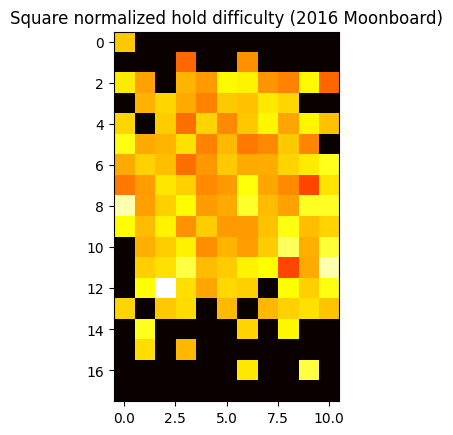

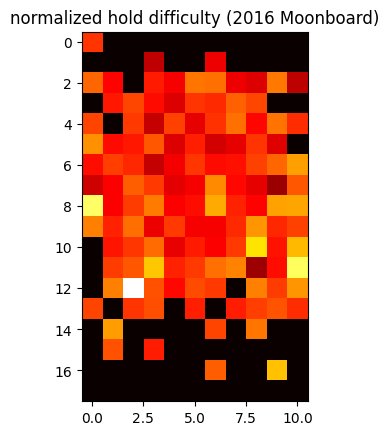

In [19]:
average_hold_difficulty = {}
average_hold_distance = {}
for hold in hold_difficulty_dict.keys():
    climb_grades = hold_difficulty_dict[hold]
    difficulty = []
    if not climb_grades:
        print("No climbs found")
        continue
    for grade in climb_grades:
        difficulty.append(french_grade_numeric_converter(grade.lower()))
    average_hold_difficulty[hold] = np.mean(difficulty)
    average_hold_distance[hold] = np.mean(hold_distance_dict[hold])
print(average_hold_difficulty)
print(average_hold_distance)

def hold_difficulty_2d(dimensions, hold_difficulty, hold_distance):
    """
    Outputs a 2d numpy array with the hold use count
    Args:
        Dimensions (tuple(int)): two-tuple with the hight and width of board

        hold_difficulty (dict(tuple(int): int)): key is alphanumeric position on board, 
                                   value is number of times hold appears in the dataset

    Returns:
        np.2darray(floats): normalized hold difficulty heatmap
    """

    use_count = np.zeros(dimensions)
    for h in hold_difficulty:
        use_count[h[0]][h[1]] = hold_difficulty[h] * hold_distance[h]
    #normalize_use = use_count / use_count.max()
    return use_count

use_array = hold_difficulty_2d((18, 11), average_hold_difficulty, average_hold_distance)

#square normalized count
normalized1 = np.sqrt(use_array)
plt.imshow(normalized1, cmap='hot', interpolation='nearest')
plt.title("Square normalized hold difficulty (2016 Moonboard)")
plt.show()

#non-normalized count
normalized2 = use_array
plt.imshow(normalized2, cmap='hot', interpolation='nearest')
plt.title("normalized hold difficulty (2016 Moonboard)")
plt.show()

In [21]:
problems = df['Moves']
grades = df['Grade']
next_hold_dict = {}

for problem, grade in zip(problems, grades):
    problem = problem.replace("'", '"')
    problem = problem.replace("True", 'true')
    problem = problem.replace("False", 'false')
    problem = json.loads(problem)
    holds = []
    for hold in problem:
        pos = hold['Description'] 
        pos = pos[0].upper() + pos[1:]
        #Start_or_end = hold['IsStart'] or hold['IsEnd']
        holds.append(pos)
    # Split holds into tuples sort in ascending height order 
    holds = [(hold[0], int(hold[1:])) for hold in holds]
    holds.sort(key=lambda x: x[1])
    holds = [c + str(r)  for c, r in holds]

    next_hold_distances = []    
    for i1 in range(len(holds)-1):
        h1_coords = get_hold_coords(holds[i1])
        h2_coords = get_hold_coords(holds[i1 + 1])
        d = hold_distance(h1_coords, h2_coords)
        next_hold_distances.append(d)
        if h1_coords in next_hold_dict:
            next_hold_dict[h1_coords].append((h2_coords, grade))

        else:
            next_hold_dict[h1_coords]= []


print(next_hold_dict)

{(13, 9): [((10, 7), '8A'), ((10, 4), '7C+'), ((9, 8), '7C+'), ((9, 8), '7C+'), ((11, 4), '7C'), ((9, 10), '7C'), ((10, 6), '7C'), ((9, 8), '7B+'), ((12, 5), '7B+'), ((12, 6), '7B+'), ((9, 8), '7B+'), ((10, 7), '7B+'), ((12, 4), '7B'), ((8, 10), '7B'), ((10, 7), '7B'), ((12, 6), '7B'), ((10, 7), '7B'), ((12, 4), '7A+'), ((10, 7), '7A+'), ((9, 9), '7A+'), ((12, 6), '7A+'), ((8, 7), '7A+'), ((12, 4), '7A+'), ((10, 7), '7A+'), ((12, 1), '7A+'), ((9, 10), '7A'), ((13, 9), '7A'), ((9, 6), '7A'), ((11, 4), '7A'), ((12, 4), '7A'), ((10, 6), '7A'), ((8, 7), '7A'), ((10, 4), '7A'), ((8, 8), '7A'), ((12, 4), '7A'), ((10, 7), '7A'), ((8, 4), '7A'), ((10, 7), '7A'), ((12, 10), '7A'), ((10, 4), '6C+'), ((12, 4), '6C+'), ((10, 9), '6C+'), ((12, 4), '6C+'), ((10, 4), '6C+'), ((11, 9), '6C+'), ((9, 6), '6C+'), ((12, 4), '6C+'), ((10, 4), '6C'), ((8, 8), '6C'), ((12, 4), '6C'), ((11, 9), '6C'), ((10, 9), '6C'), ((10, 4), '6C'), ((12, 6), '6C'), ((10, 7), '6C'), ((9, 6), '6C'), ((12, 4), '6C'), ((11, 5)

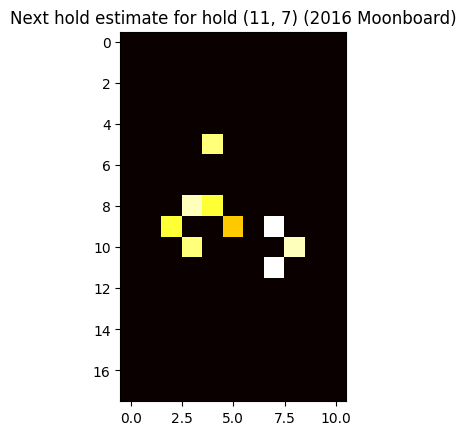

In [28]:
def hold_difficulty_2d(dimensions, current_hold, next_holds):
    """
    Outputs a 2d numpy array with the hold use count
    Args:
        Dimensions (tuple(int)): two-tuple with the hight and width of board

        hold_difficulty (dict(tuple(int): int)): key is alphanumeric position on board, 
                                   value is number of times hold appears in the dataset

    Returns:
        np.2darray(floats): normalized hold difficulty heatmap
    """

    use_count = np.zeros(dimensions)
    for h in next_holds:
        use_count[h[0][0]][h[0][1]] = french_grade_numeric_converter(h[1].lower())
    #normalize_use = use_count / use_count.max()
    use_count[current_hold[0]][current_hold[1]] = 15
    return use_count

curr_hold = (11, 7)
next_holds = next_hold_dict[curr_hold]
use_array = hold_difficulty_2d((18, 11), curr_hold, next_holds)

#non-normalized count
normalized2 = use_array
plt.imshow(normalized2, cmap='hot', interpolation='nearest')
plt.title(f"Next hold estimate for hold {curr_hold} (2016 Moonboard)")
plt.show()

### Generative route creation